# File input/output with scipy.io

* Loading and saving matlab filese

In [5]:
import numpy as np
from scipy import io as spio

a = np.ones((3,3))
spio.savemat('file.mat', {'a':a}) ## savemat expects a dictionary

data = spio.loadmat('file.mat', struct_as_record=True)
data['a']

array([[ 1.,  1.,  1.],
       [ 1.,  1.,  1.],
       [ 1.,  1.,  1.]])

* Reading from tab-delimited files

In [3]:
import numpy as np
data = np.genfromtxt('input.tsv', dtype=['S3', 'i8', 'i8', 'S10'],
                    delimiter='\t', names=True)
data

array([(b'HSV', 21, 11, b'My favorit'), (b'FCB', 20, 10, b'Well, o.k.'),
       (b'BVB', 19, 11, b"It's cool!")], 
      dtype=[('Team', 'S3'), ('Score', '<i8'), ('Goals', '<i8'), ('Note', 'S10')])

# Special functions: _scipy.special_

Special functions are transcendental functions. I will explore their properties later.

* [Bessel function](https://en.wikipedia.org/wiki/Bessel_function), such as _scipy.special.jn_
* [Elliptic function](https://en.wikipedia.org/wiki/Elliptic_function), such as _scipy.special.ellipj_
* [Gamma function](https://en.wikipedia.org/wiki/Gamma_function), such as _scipy.special.gamma_ and _scipy.special.gammaln_.
* [Error function](http://en.wikipedia.org/wiki/Error_function), or Erf, the area under a Gausian curve, _scipy.special.erf_.

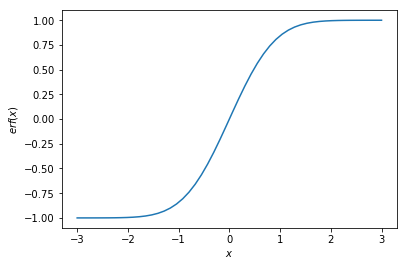

In [4]:
from scipy import special
import matplotlib.pyplot as plt
x = np.linspace(-3, 3)
plt.plot(x, special.erf(x))
plt.xlabel('$x$')
plt.ylabel('$erf(x)$')
plt.show()

# Linear algebra

The module _scipy.linalg_ provides standard linear algebra operations.

* Determinant of a square matrix

In [7]:
from scipy import linalg

arr = np.array([[5,6],
                [1,2]])
linalg.det(arr)

0.0

In [8]:
arr2 = np.array([[3,4],
                 [6,8]])
linalg.det(arr2)

0.0

* Inverse of a square matrix

In [11]:
arr = np.array([[1,2],
                [3,4]])
iarr = linalg.inv(arr)
iarr

array([[-2. ,  1. ],
       [ 1.5, -0.5]])

In [12]:
np.allclose(np.dot(arr, iarr), np.eye(2))

True

* Singular-value decomposition

In [17]:
arr = np.arange(9).reshape((3,3)) + np.diag([1,0,1])
arr

array([[1, 1, 2],
       [3, 4, 5],
       [6, 7, 9]])

In [21]:
urr, spec, vharr = linalg.svd(arr)
## array spectrum (eigenvectors)
spec

array([ 14.88982544,   0.45294236,   0.29654967])

In [22]:
## verify the SVD decomposition
sarr = np.diag(spec)
svd_mat = urr.dot(sarr).dot(vharr)
np.allclose(svd_mat, arr)

True

# Fast Fourier Transformations (FFT)

In [26]:
time_step = 0.02
period = 5.
time_vec = np.arange(0, 20, time_step)
sig = np.sin(2 * np.pi/period * time_vec) + \
      0.5 * np.random.randn(time_vec.size)
    
from scipy import fftpack
sample_freq = fftpack.fftfreq(sig.size, d=time_step)
sig_fft = fftpack.fft(sig)

pidxs = np.where(sample_freq>0)
freqs = sample_freq[pidxs]
power = np.abs(sig_fft)[pidxs]

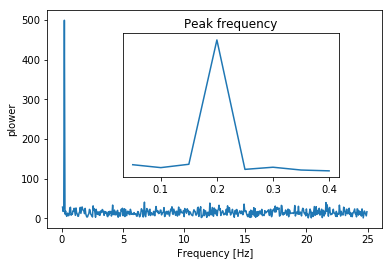

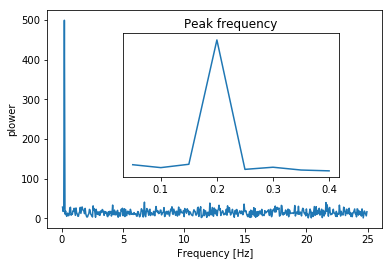

In [30]:
## visualise the signal FFT
import pylab as pl

pl.figure()
pl.plot(freqs, power)
pl.xlabel('Frequency [Hz]')
pl.ylabel('plower')
axes = pl.axes([0.3, 0.3, 0.5, 0.5])
pl.title('Peak frequency')
pl.plot(freqs[:8], power[:8])
pl.setp(axes, yticks=[])
pl.show()

In [31]:
freq = freqs[power.argmax()]
np.allclose(freq, 1./period)

True

/mnt/projects/miniconda3/lib/python3.6/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


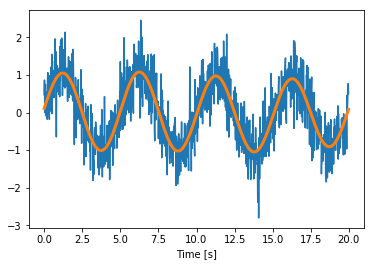

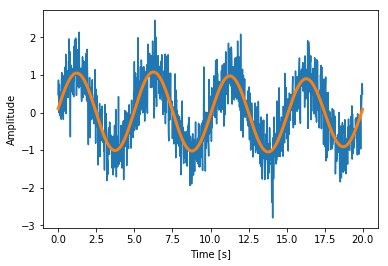

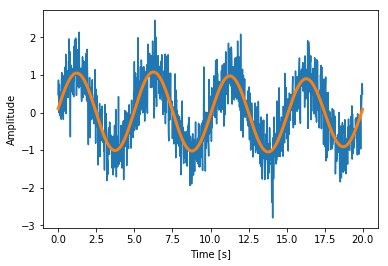

In [36]:
## remove high-frequency noise
sig_fft[np.abs(sample_freq) > freq] = 0
main_sig = fftpack.ifft(sig_fft)

import pylab as plt
plt.figure()
plt.plot(time_vec, sig)
plt.plot(time_vec, main_sig, linewidth=3)
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.show()